A-star grid based implementation using matplotlib
matplotlib - https://matplotlib.org/


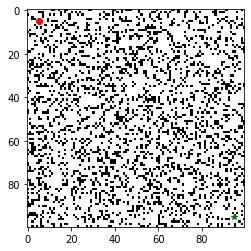

In [11]:
#packages to import
from __future__ import print_function, division
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


print("A-star grid based implementation using matplotlib")
print("matplotlib - https://matplotlib.org/")


#parameters for constructing the window
M = 100     #Rows
N = 100       #Columns

#to calculate the presence of obstacle at a point in space
OBSTACLE_PROBABILITY = 0.25

#for GRID Formation
GRID = np.int8(np.random.random((M, N)) > (1 - OBSTACLE_PROBABILITY))

#start node coordinates 
START_NODE = (5, 5)

#goal node coordinates
GOAL_NODE = (M-5, N-5)

#to construct the maze using numpy
X, Y = np.meshgrid([i for i in range(N)], [i for i in range(M)])
HEURISTIC = np.abs(X - GOAL_NODE[1]) + np.abs(Y - GOAL_NODE[0])
closed = np.zeros((M, N))
closed[START_NODE] = 1
expand = -np.ones((M, N))
action = -np.ones((M, N), dtype=np.int8)


x = START_NODE[0]
y = START_NODE[1]
g = 0
h = HEURISTIC[x, y]
f = g + h
DELTAS = [[1, 0],
         [0, 1],
         [-1, 0],
         [0, -1]]

open = [[f, g, x, y]]

found = False
resign = False
count = 0
cost = 1

fig, ax = plt.subplots()
route, = plt.plot([], [], 'b-')

def init():
    ax.imshow(np.logical_not(GRID), cmap="gray")
    ax.plot(START_NODE[1], START_NODE[0], 'ro')
    ax.plot(GOAL_NODE[1], GOAL_NODE[0], 'g*')
    return route,

def get_current_route(current_node):
    route = [current_node]
    while route[0] != START_NODE:
        node = route[0]
        delta = DELTAS[action[node]]
        previous_node = (node[0] - delta[0], node[1] - delta[1])
        route.insert(0, previous_node)
    return np.array(route)

def animate(_):
    global count, open
    if len(open) == 0:
        resign = True
        return route,
    else:
        open.sort()
        open.reverse()
        next = open.pop()
        x = next[2]
        y = next[3]
        g = next[1]
        expand[x, y] = count
        count += 1
        
        if (x, y) == GOAL_NODE:
            found = True
            open = []
        else:
            for i in range(len(DELTAS)):
                x1 = x + DELTAS[i][0]
                y1 = y + DELTAS[i][1]
                if x1 >= 0 and x1 < M and y1 >=0 and y1 < N:
                    if closed[x1, y1] == 0 and GRID[x1, y1] == 0:
                        g1 = g + cost
                        f1 = HEURISTIC[x1, y1]
                        open.append([f1, g1, x1, y1])
                        closed[x1, y1] = 1
                        action[x1, y1] = i
            current_route = get_current_route((x, y))
            x = current_route[:, 1]
            y = current_route[:, 0]
            route.set_data(x, y)
        return route,

anim = animation.FuncAnimation(fig, animate, 350, interval=50, init_func=init)
plt.show()